In [ ]:
import math
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from collections import defaultdict
import os
import pandas as pd
import collections
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#get correct directory
os.chdir('/content/drive/MyDrive/SEM 6/FYP1/Phase1')

# Calculate distance of landmark

In [ ]:
def calculateDistance(xy_1,xy_2):
  x1,y1,x2,y2 = xy_1[0],xy_1[1],xy_2[0],xy_2[1]
  dist = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
  return dist

def centroid(vertexes):
     _x_list = [vertex [0] for vertex in vertexes]
     _y_list = [vertex [1] for vertex in vertexes]
     _len = len(vertexes)
     _x = int(sum(_x_list) / _len)
     _y = int(sum(_y_list) / _len)
     return(_x, _y)

In [ ]:
def get_distance(im,landmark):
  vertical = False

  #get the mask with the correct colour
  for (lower, upper) in landmark:
    # create NumPy arrays from the boundaries
    lower = np.array(lower, dtype = "uint8")
    upper = np.array(upper, dtype = "uint8") 
    # find the colors within the specified boundaries and apply the mask
    mask = cv2.inRange(im, lower, upper) 
    # #see the output of applying the mask
    # output = cv2.bitwise_and(im, im, mask = mask) 
    # cv2_imshow(output)

  #get the x,y coordinate for masked colour
  coord = cv2.findNonZero(mask)
  X = []
  Y = []
  for i in coord:
    yx = str(i).split("[[")[1].split("]]")[0].strip().split(' ')
    yx = [i for i in yx if i]
    Y.append(int(yx[0]))
    X.append(int(yx[1]))
  # print(X,Y)

  # get all y
  y_res = defaultdict(list)
  for ele in Y:
      y_res[ele]
  y_coordinates = []
  for key, value in y_res.items() :
      y_coordinates.append(key)
  y_coordinates.sort()
  split_value = 0
  for i,a in enumerate(y_coordinates[:-1]):
    if abs(y_coordinates[i+1]-a) >5:
      split_value = i+1
      # print(y_coordinates[i+1],a)
  y_first = y_coordinates[:split_value]
  y_second = y_coordinates[split_value:]
  # print(y_first)
  # print(y_second)

  #check vertical
  if (not y_first) or (not y_second):
    vertical = True
    # print(y_coordinates)

  # get all x
  if not vertical:
    x_res = defaultdict(list)
    for ele in X:
        x_res[ele]
    x_coordinates = []
    for key, value in x_res.items() :
        x_coordinates.append(key)
    x_coordinates.sort()
    # print(x_coordinates)
  else:
    x_res = defaultdict(list)
    for ele in X:
        x_res[ele]
    x_coordinates = []
    for key, value in x_res.items() :
        x_coordinates.append(key)
    x_coordinates.sort()
    split_value = 0
    for i,a in enumerate(x_coordinates[:-1]):
      if abs(x_coordinates[i+1]-a) >5:
        split_value = i+1
        # print(y_coordinates[i+1],a)
    x_first = x_coordinates[:split_value]
    x_second = x_coordinates[split_value:]
    # print(x_first)
    # print(x_second)

  # find box
  if not vertical:
    box_1 = [(y_first[0], x_coordinates[0]), (y_first[-1], x_coordinates[0]), (y_first[0], x_coordinates[-1]), (y_first[-1], x_coordinates[-1])]
    box_2 = [(y_second[0], x_coordinates[0]), (y_second[-1], x_coordinates[0]), (y_second[0], x_coordinates[-1]), (y_second[-1], x_coordinates[-1])]
  else:
    box_1 = [(y_coordinates[0], x_first[0]), (y_coordinates[0], x_first[-1]), (y_coordinates[-1], x_first[0]), (y_coordinates[-1], x_first[-1])]
    box_2 = [(y_coordinates[0], x_second[0]), (y_coordinates[0], x_second[-1]), (y_coordinates[-1], x_second[0]), (y_coordinates[-1], x_second[-1])]

  # find centre of box
  center_1 = centroid(box_1)
  center_2 = centroid(box_2)

  #calculate distance
  distance = calculateDistance(center_1,center_2)

  return distance, center_1, center_2

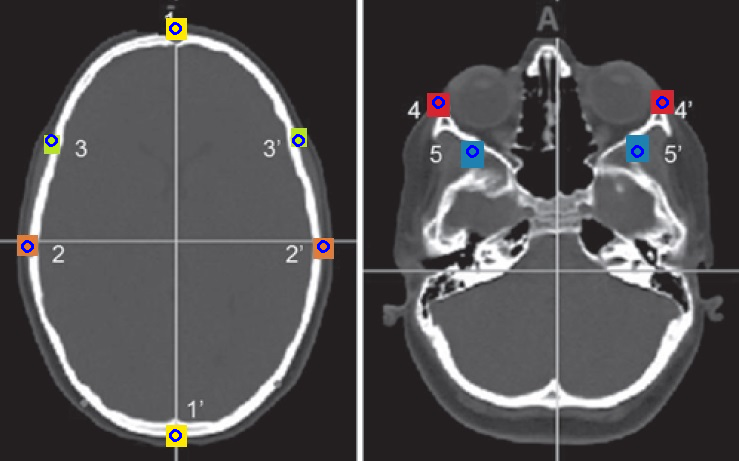

Distance intercoronal (mm) : 65.352083251
Distance intertemporal (mm) : 43.656249945
Distance cwidth (mm) : 78.316666568
Distance clength (mm) : 107.685416531
Distance orbital (mm) : 59.26666659200001


In [ ]:
# Load image
im3 = cv2.imread('skull_testing3.jpg')

# OpenCV uses BGR ordering
landmark_intercoronal = [([26,225,175], [35, 230, 190])] #light green
landmark_intertemporal = [([171,125,30], [178,130,40])] #dark blue
landmark_cwidth = [([56,123,208], [71, 128, 230])] #orange
landmark_clength = [([0,230,245], [10,240,255])] #yellow
landmark_orbital = [([48,36,177], [64,53,214])] #red

distance_intercoronal, center_1_intercoronal, center_2_intercoronal = get_distance(im3,landmark_intercoronal)
distance_intertemporal, center_1_intertemporal, center_2_intertemporal = get_distance(im3,landmark_intertemporal)
distance_cwidth, center_1_cwidth, center_2_cwidth = get_distance(im3,landmark_cwidth)
distance_clength, center_1_clength, center_2_clength = get_distance(im3,landmark_clength)
distance_orbital, center_1_orbital, center_2_orbital = get_distance(im3,landmark_orbital)

cv2.circle(im3,center_1_intercoronal,5,(300,0,0),2)
cv2.circle(im3,center_2_intercoronal,5,(300,0,0),2)
cv2.circle(im3,center_1_intertemporal,5,(300,0,0),2)
cv2.circle(im3,center_2_intertemporal,5,(300,0,0),2)
cv2.circle(im3,center_1_cwidth,5,(300,0,0),2)
cv2.circle(im3,center_2_cwidth,5,(300,0,0),2)
cv2.circle(im3,center_1_clength,5,(300,0,0),2)
cv2.circle(im3,center_2_clength,5,(300,0,0),2)
cv2.circle(im3,center_1_orbital,5,(300,0,0),2)
cv2.circle(im3,center_2_orbital,5,(300,0,0),2)
cv2_imshow(im3)

print(f'Distance intercoronal (mm) : {(distance_intercoronal * 0.0264583333)*10}')
print(f'Distance intertemporal (mm) : {(distance_intertemporal * 0.0264583333)*10}')
print(f'Distance cwidth (mm) : {(distance_cwidth * 0.0264583333)*10}')
print(f'Distance clength (mm) : {(distance_clength * 0.0264583333)*10}')
print(f'Distance orbital (mm) : {(distance_orbital * 0.0264583333)*10}')

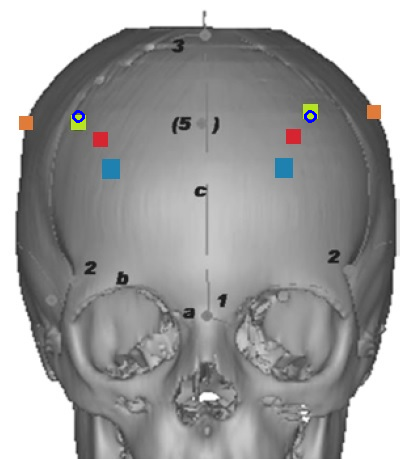

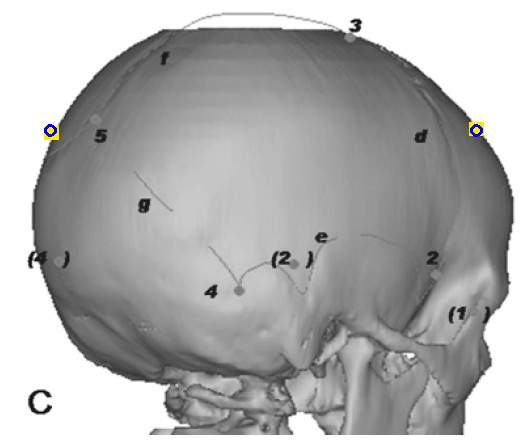

Distance intercoronal (mm) : 61.38333325600001
Distance intertemporal (mm) : 46.037499942000004
Distance cwidth (mm) : 92.07499988400001
Distance clength (mm) : 112.712499858
Distance orbital (mm) : 50.799999936000006


In [ ]:
# Load image
im = cv2.imread('skull_testing1.jpg')
im2 = cv2.imread('skull_testing2.jpg')

# OpenCV uses BGR ordering
landmark_intercoronal = [([26,225,175], [35, 230, 190])] #light green
landmark_intertemporal = [([171,125,30], [178,130,40])] #dark blue
landmark_cwidth = [([56,123,208], [71, 128, 230])] #orange
landmark_clength = [([0,230,245], [10,240,255])] #yellow
landmark_orbital = [([48,36,177], [64,53,214])] #red

distance_intercoronal, center_1_intercoronal, center_2_intercoronal = get_distance(im,landmark_intercoronal)
distance_intertemporal, center_1_intertemporal, center_2_intertemporal = get_distance(im,landmark_intertemporal)
distance_cwidth, center_1_cwidth, center_2_cwidth = get_distance(im,landmark_cwidth)
distance_clength, center_1_clength, center_2_clength = get_distance(im2,landmark_clength)
distance_orbital, center_1_orbital, center_2_orbital = get_distance(im,landmark_orbital)

cv2.circle(im,center_1_intercoronal,5,(300,0,0),2)
cv2.circle(im,center_2_intercoronal,5,(300,0,0),2)
cv2_imshow(im)
cv2.circle(im2,center_1_clength,5,(300,0,0),2)
cv2.circle(im2,center_2_clength,5,(300,0,0),2)
cv2_imshow(im2)

print(f'Distance intercoronal (mm) : {(distance_intercoronal * 0.0264583333)*10}')
print(f'Distance intertemporal (mm) : {(distance_intertemporal * 0.0264583333)*10}')
print(f'Distance cwidth (mm) : {(distance_cwidth * 0.0264583333)*10}')
print(f'Distance clength (mm) : {(distance_clength * 0.0264583333)*10}')
print(f'Distance orbital (mm) : {(distance_orbital * 0.0264583333)*10}')

# Predict age from Intercoronal Distance

> https://github.com/rijutawagh04/Predicting-Age-of-Abalones/blob/master/Classification_Abalone.ipynb


> https://bids.github.io/2015-06-04-berkeley/intermediate-python/03-sklearn-abalone.html

> https://shrikar.com/predicting-height-of-an-user/

In [ ]:
data_dict = collections.defaultdict(dict)

## Create data

In [ ]:
df = pd.read_excel("2DMeasurements(mm).xlsx")

ages = []
intercoronals = []
cephalics_l = []
cephalics_w = []
laterals = []
intertemporals = []

for i, item in df.iterrows():
  ages.append(item['Age'])
  intercoronals.append([item['Mean_Intercoronal'],item['Sd_Intercoronal']])
  cephalics_l.append([item['Mean_Cephalic_Length'],item['Sd_Cephalic_Length']])
  cephalics_w.append([item['Mean_Cephalic_Width'],item['Sd_Cephalic_Width']])
  laterals.append([item['Mean_Lateral'],item['Sd_Lateral']])
  intertemporals.append([item['Mean_Intertemporal'],item['Sd_Intertemporal']])

In [ ]:
size = 30

for age, intercoronal, cephalic_l, cephalic_w, lateral, intertemporal in zip(ages, intercoronals, cephalics_l, cephalics_w, laterals, intertemporals):
  patients_intercoronal = np.round_(np.random.normal(intercoronal[0], intercoronal[1], (size, 1)),decimals = 2)
  patients_cephalic_l = np.round_(np.random.normal(cephalic_l[0], cephalic_l[1], (size, 1)),decimals = 2)
  patients_cephalic_w = np.round_(np.random.normal(cephalic_w[0], cephalic_w[1], (size, 1)),decimals = 2)
  patients_lateral = np.round_(np.random.normal(lateral[0], lateral[1], (size, 1)),decimals = 2)
  patients_intertemporal = np.round_(np.random.normal(intertemporal[0], intertemporal[1], (size, 1)),decimals = 2)
  
  data_dict[age]['intercoronal'] = patients_intercoronal.tolist()
  data_dict[age]['cephalic_l'] = patients_cephalic_l.tolist()
  data_dict[age]['cephalic_w'] = patients_cephalic_w.tolist()
  data_dict[age]['lateral'] = patients_lateral.tolist()
  data_dict[age]['intertemporal'] = patients_intertemporal.tolist()



In [ ]:
dataList = []
for key, val in data_dict.items():
  
  age = key
  val_intercoronal = val['intercoronal']
  val_cephalic_l = val['cephalic_l']
  val_cephalic_w = val['cephalic_w']
  val_lateral = val['lateral']
  val_intertemporal = val['intertemporal']

  for intercoronal, cephalic_l, cephalic_w, lateral, intertemporal in zip(val_intercoronal, val_cephalic_l, val_cephalic_w, val_lateral, val_intertemporal):
    dataList.append([age, intercoronal[0], cephalic_l[0], cephalic_w[0], lateral[0], intertemporal[0]])
  
data_df = pd.DataFrame(dataList, columns = ['Age', 'Intercoronal_Length', 'Cephalic_Length', 'Cephalic_Width', 'Lateral_Orbital', 'Intertemporal'])

In [ ]:
data_df.to_excel('dummy_data.xlsx', sheet_name = 'New_sheet',index=False)
data_df

,Age,Intercoronal_Length,Cephalic_Length,Cephalic_Width,Lateral_Orbital,Intertemporal
0,4.0,126.16,181.38,137.24,89.48,74.33
1,4.0,118.42,165.00,135.31,80.51,75.85
2,4.0,115.90,163.41,139.90,81.06,66.47
3,4.0,114.50,175.03,137.34,82.89,67.12
4,4.0,106.77,160.05,128.26,84.70,62.49
...,...,...,...,...,...,...
505,20.0,121.34,182.88,133.37,96.79,74.70
506,20.0,113.83,182.95,133.72,94.77,82.80
507,20.0,122.19,182.29,138.32,94.04,73.37
508,20.0,120.43,190.88,141.20,100.25,77.35


In [ ]:
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import warnings
warnings.filterwarnings('ignore')

'''
'micro': Calculate metrics globally by counting the total true positives, false negatives and false positives.
'macro': Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.
'weighted': Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label). This alters ‘macro’ to account for label imbalance; it can result in an F-score that is not between precision and recall.
'''

def recall_report(y_true,y_pred):
  confusion_matrix_ = np.sum(multilabel_confusion_matrix(y_true, y_pred),axis=0)
  recall = confusion_matrix_[1,1]/(confusion_matrix_[1,1]+confusion_matrix_[1,0])
  print(classification_report(y_true,y_pred))
  # print(multilabel_confusion_matrix(y_true, y_pred))
  # return recall

def recall_score(y_true,y_pred):
  confusion_matrix_ = np.sum(multilabel_confusion_matrix(y_true, y_pred),axis=0)
  recall = confusion_matrix_[1,1]/(confusion_matrix_[1,1]+confusion_matrix_[1,0])
  return recall

def weightedf1_score(y_true,y_pred):
  f1 = f1_score(y_true,y_pred,average='weighted')
  return f1

def getAccuracy(testSet, predictions):
    correct = 0
    for x in range(len(testSet)):
        if testSet[x][-1] == predictions[x]:
            correct += 1
    return (correct/float(len(testSet))) * 100.0


## Multi-Label (Less Label)

In [ ]:
# get summary metrics for df
print(data_df.describe())

              Age  Intercoronal_Length  ...  Lateral_Orbital  Intertemporal
count  510.000000           510.000000  ...       510.000000     510.000000
mean    12.000000           116.354961  ...        91.402725      72.006490
std      4.903789             5.846439  ...         5.685308       4.651754
min      4.000000           101.880000  ...        75.080000      60.100000
25%      8.000000           112.297500  ...        87.515000      68.937500
50%     12.000000           116.305000  ...        91.845000      71.750000
75%     16.000000           120.492500  ...        95.710000      74.607500
max     20.000000           132.500000  ...       106.800000      95.410000

[8 rows x 6 columns]


In [ ]:
# check null 
data_df.select_dtypes(include=['object']).isnull().sum()
data_df.select_dtypes(include=[np.number]).isnull().sum()

Age                    0
Intercoronal_Length    0
Cephalic_Length        0
Cephalic_Width         0
Lateral_Orbital        0
Intertemporal          0
dtype: int64

Add column for classification


> (0-5)(6-10)(11-15)(16-20)

> 1,2,3,4





In [ ]:
def label_age (row):
  if row['Age']>=0 and row['Age']<=5:
    return 1
  elif row['Age'] >=6 and row['Age']<=10:
    return 2
  elif row['Age']>=11 and row['Age']<=15:
    return 3
  elif row['Age']>=16 and row['Age']<=20:
    return 4
  return 0

In [ ]:
data_df['Age_class']=data_df.apply (lambda row: label_age (row),axis=1)

In [ ]:
data_df

,Age,Intercoronal_Length,Cephalic_Length,Cephalic_Width,Lateral_Orbital,Intertemporal,Age_class
0,4.0,126.16,181.38,137.24,89.48,74.33,1
1,4.0,118.42,165.00,135.31,80.51,75.85,1
2,4.0,115.90,163.41,139.90,81.06,66.47,1
3,4.0,114.50,175.03,137.34,82.89,67.12,1
4,4.0,106.77,160.05,128.26,84.70,62.49,1
...,...,...,...,...,...,...,...
505,20.0,121.34,182.88,133.37,96.79,74.70,4
506,20.0,113.83,182.95,133.72,94.77,82.80,4
507,20.0,122.19,182.29,138.32,94.04,73.37,4
508,20.0,120.43,190.88,141.20,100.25,77.35,4


In [ ]:
y = data_df[['Age_class']]
X = data_df.drop(['Age','Age_class'], axis=1)

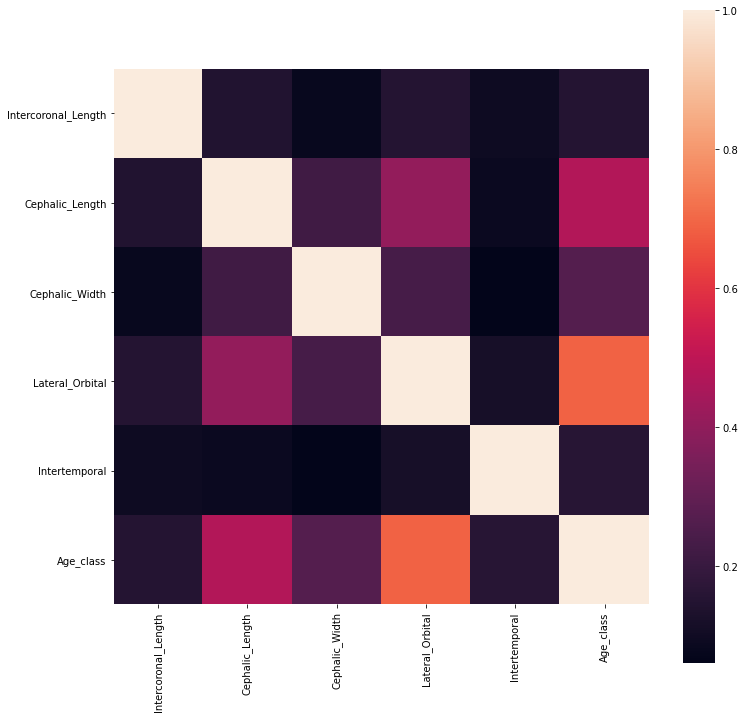

In [ ]:
import seaborn as sns
corr = data_df.select_dtypes(include = ['float64', 'int64']).iloc[:, 1:].corr()
plt.figure(figsize=(12, 12))
sns.heatmap(corr, vmax=1, square=True)
# sns.plt.show()

<Figure size 432x288 with 0 Axes>

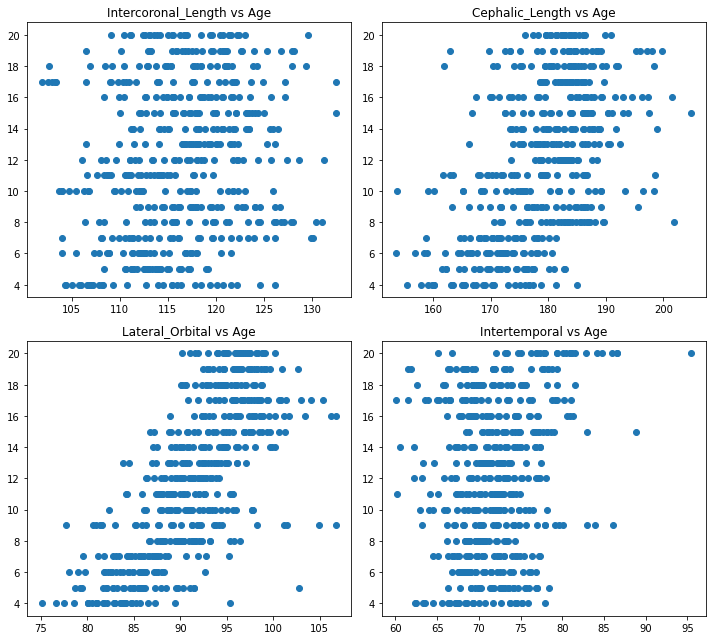

In [ ]:
plt.figure(1)
f, axarr = plt.subplots(2, 2, figsize=(10, 9))
age = data_df.Age.values

axarr[0, 0].scatter(data_df.Intercoronal_Length.values, age)
axarr[0, 0].set_title('Intercoronal_Length vs Age')
axarr[0, 1].scatter(data_df.Cephalic_Length.values, age)
axarr[0, 1].set_title('Cephalic_Length vs Age')
axarr[1, 0].scatter(data_df.Lateral_Orbital.values, age)
axarr[1, 0].set_title('Lateral_Orbital vs Age')
axarr[1, 1].scatter(data_df.Intertemporal.values, age)
axarr[1, 1].set_title('Intertemporal vs Age')

plt.tight_layout()
plt.show()

In [ ]:
X = preprocessing.scale(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

###KNN

best score: 0.5214958530798004, with k=38


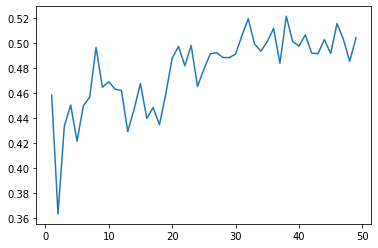

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn_list = range(1,50)
max_score = best_kn = 0
score = []
for kn in kn_list:

  neigh = KNeighborsClassifier(n_neighbors=kn)
  neigh.fit(X_train, y_train)

  y_pred = neigh.predict(X_test)
  y_true = y_test.to_numpy()
  test_score = weightedf1_score(y_true, y_pred)
  score.append(test_score)

  if test_score > max_score:
    max_score = test_score
    best_kn = kn

plt.plot(kn_list, score)
print(f'best score: {max_score}, with k={best_kn}')

In [ ]:
neigh_class = KNeighborsClassifier(n_neighbors=best_kn)
neigh_class.fit(X_train, y_train)

y_pred = neigh_class.predict(X_test)
y_true = y_test.to_numpy()
test_score = weightedf1_score(y_true, y_pred)
print(test_score)

recall_report(y_true, y_pred)

0.5214958530798004
              precision    recall  f1-score   support

           1       0.67      0.30      0.41        20
           2       0.61      0.51      0.56        43
           3       0.41      0.67      0.51        42
           4       0.60      0.50      0.55        48

    accuracy                           0.52       153
   macro avg       0.57      0.49      0.51       153
weighted avg       0.56      0.52      0.52       153



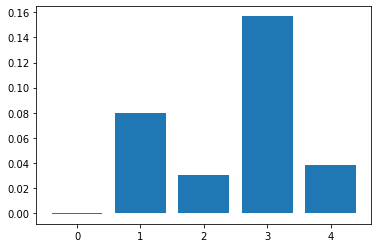

In [ ]:
from sklearn.inspection import permutation_importance

results = permutation_importance(neigh, X_train, y_train, scoring='accuracy')
# get importance
importance = results.importances_mean

# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error

# Accuracy
print("Accuracy: ",accuracy_score(y_test, y_pred)*100)

# Mean Absolute Error 
mae=mean_absolute_error(y_test, y_pred);
print("MAE: "+str(mae))

# RMSE 
rmse = math.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: "+str(rmse))

# Median Absolute error
Medae= median_absolute_error(y_test, y_pred)
print("Median Absolute Error: "+str(Medae)) 

Accuracy:  52.28758169934641
MAE: 0.5555555555555556
RMSE: 0.8440487549031719
Median Absolute Error: 0.0


### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.metrics import accuracy_score

log_reg = LogisticRegression(multi_class='multinomial',solver ='newton-cg').fit(X_train, y_train)
print("Intercept is ",log_reg.intercept_)
print("Coefficient is ",log_reg.coef_)
y_pred=log_reg.predict(X_test) 
y_true = y_test.to_numpy()
test_score = weightedf1_score(y_true, y_pred)
print("Best f1: ",test_score)

recall_report(y_true, y_pred)

Intercept is  [-1.75961937  0.78063548  1.02093532 -0.04195143]
Coefficient is  [[-0.46336288 -0.65728148 -0.48095351 -1.63827086  0.06944303]
 [ 0.21244223 -0.22216257  0.0085665  -0.64681737 -0.25357404]
 [ 0.22858351  0.31467317  0.11119369  0.28693247 -0.04318482]
 [ 0.02233714  0.56477089  0.36119331  1.99815575  0.22731584]]
Best f1:  0.5279939066898257
              precision    recall  f1-score   support

           1       0.43      0.15      0.22        20
           2       0.47      0.56      0.51        43
           3       0.51      0.52      0.52        42
           4       0.65      0.71      0.68        48

    accuracy                           0.54       153
   macro avg       0.52      0.49      0.48       153
weighted avg       0.53      0.54      0.53       153



In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error

# Accuracy
print("Accuracy: ",accuracy_score(y_test, y_pred)*100)

# Mean Absolute Error 
mae=mean_absolute_error(y_test, y_pred);
print("MAE: "+str(mae))

# RMSE 
rmse = math.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: "+str(rmse))

# Median Absolute error
Medae= median_absolute_error(y_test, y_pred)
print("Median Absolute Error: "+str(Medae)) 

Accuracy:  54.248366013071895
MAE: 0.5490196078431373
RMSE: 0.8631906158060839
Median Absolute Error: 0.0


### Random Forest

Max Score 0.5032407407407408, N=44


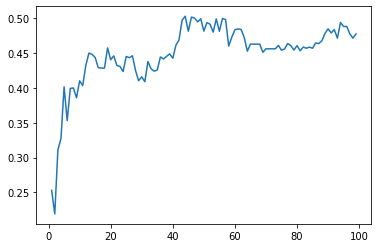

In [ ]:
from sklearn.ensemble import RandomForestClassifier

score = []
i_list = range(1,100)
max_score = best_i = 0
for i in i_list:
  # print("N value =",i)
  #Create a Gaussian Classifier
  rf=RandomForestClassifier(n_estimators=i,random_state=92,max_depth=6,max_samples=10)

  #Train the model using the training sets y_pred=clf.predict(X_test)
  rf.fit(X_train,y_train)
  y_pred = rf.predict(X_test)
  y_true = y_test.to_numpy()

  test_score = weightedf1_score(y_true, y_pred)
  # f1_macro = f1_score(y_true, y_pred, average='macro')
  score.append(test_score)

  if test_score>max_score:
    max_score = test_score
    best_i = i

print(f"Max Score {max_score}, N={best_i}".format(max_score, best_i))
plt.plot(i_list,score)
  

In [ ]:
rf=RandomForestClassifier(n_estimators=best_i,random_state=92,max_depth=6,max_samples=10)

rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
y_true = y_test.to_numpy()

test_score = weightedf1_score(y_true, y_pred)

recall_report(y_true, y_pred)

              precision    recall  f1-score   support

           1       0.20      0.05      0.08        20
           2       0.47      0.58      0.52        43
           3       0.46      0.55      0.50        42
           4       0.69      0.65      0.67        48

    accuracy                           0.52       153
   macro avg       0.46      0.46      0.44       153
weighted avg       0.50      0.52      0.50       153



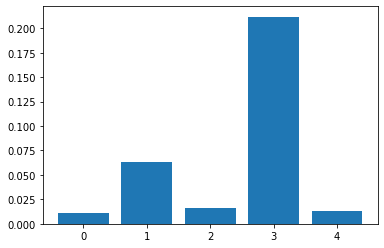

In [ ]:
from sklearn.inspection import permutation_importance

results = permutation_importance(rf, X_train, y_train, scoring='accuracy')
# get importance
importance = results.importances_mean

# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error

# Accuracy
print("Accuracy: ",accuracy_score(y_test, y_pred)*100)

# Mean Absolute Error 
mae=mean_absolute_error(y_test, y_pred);
print("MAE: "+str(mae))

# RMSE 
rmse = math.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: "+str(rmse))

# Median Absolute error
Medae= median_absolute_error(y_test, y_pred)
print("Median Absolute Error: "+str(Medae)) 

Accuracy:  54.248366013071895
MAE: 0.5490196078431373
RMSE: 0.8631906158060839
Median Absolute Error: 0.0


### MLP

In [ ]:
from sklearn.neural_network import MLPClassifier

activation_list = ['identity', 'logistic', 'tanh', 'relu']
solver_list = ['lbfgs', 'sgd', 'adam']
best_score = 0

for active in activation_list:
  for solve in solver_list:
    clf = MLPClassifier(hidden_layer_sizes=(5), activation = active,solver=solve , random_state=1, max_iter=5000).fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    y_true = y_test.to_numpy()
    recall = weightedf1_score(y_true,y_pred)
    print(active," ", solve," ", recall)
    if recall > best_score:
      best_score = recall
      best_active = active
      best_solve = solve
    
print(f'Best Score: {best_score} ({best_active},{best_solve})')

identity   lbfgs   0.5332062295791783
identity   sgd   0.5050984472856314
identity   adam   0.50062988984588
logistic   lbfgs   0.5164934943928136
logistic   sgd   0.4514048502018379
logistic   adam   0.5376169251912807
tanh   lbfgs   0.4844037581931151
tanh   sgd   0.5557733019585087
tanh   adam   0.5279041423364815
relu   lbfgs   0.5289720916018493
relu   sgd   0.5257561252349042
relu   adam   0.5384731847085993
Best Score: 0.5557733019585087 (tanh,sgd)


In [ ]:
clf = MLPClassifier(hidden_layer_sizes=(5), activation = best_active,solver=best_solve, random_state=1, max_iter=5000).fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_true = y_test.to_numpy()

recall = weightedf1_score(y_true,y_pred)
print(recall)

recall_report(y_true,y_pred)


0.5557733019585087
              precision    recall  f1-score   support

           1       1.00      0.20      0.33        20
           2       0.56      0.63      0.59        43
           3       0.46      0.52      0.49        42
           4       0.64      0.71      0.67        48

    accuracy                           0.57       153
   macro avg       0.67      0.52      0.52       153
weighted avg       0.62      0.57      0.56       153



In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error

# Accuracy
print("Accuracy: ",accuracy_score(y_test, y_pred)*100)

# Mean Absolute Error 
mae=mean_absolute_error(y_test, y_pred);
print("MAE: "+str(mae))

# RMSE 
rmse = math.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: "+str(rmse))

# Median Absolute error
Medae= median_absolute_error(y_test, y_pred)
print("Median Absolute Error: "+str(Medae)) 

Accuracy:  56.86274509803921
MAE: 0.49673202614379086
RMSE: 0.7921180343813394
Median Absolute Error: 0.0


### Cross Validate

In [ ]:
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_validate

def cross_validate_models(models, X, y):
    '''
    cross_validate and return the best model.
    '''
    features = ['Models',
                'test_f1_macro_mean', 'test_f1_macro_std', 'train_f1_macro_mean', 'train_f1_macro_std',
                'test_f1_weighted_mean', 'test_f1_weighted_std', 'train_f1_weighted_mean', 'train_f1_weighted_std',
                'test_f1_micro_mean', 'test_f1_micro_std', 'train_f1_micro_mean', 'train_f1_micro_std',
                'test_recall_weighted_mean', 'test_recall_weighted_std', 'train_recall_weighted_mean', 'train_recall_weighted_std',
                'test_recall_macro_mean', 'test_recall_macro_std', 'train_recall_macro_mean', 'train_recall_macro_std',
                'test_recall_micro_mean', 'test_recall_micro_std', 'train_recall_micro_mean', 'train_recall_micro_std',
                'test_precision_weighted_mean', 'test_precision_weighted_std', 'train_precision_weighted_mean', 'train_precision_weighted_std', 
                'test_precision_macro_mean', 'test_precision_macro_std', 'train_precision_macro_mean', 'train_precision_macro_std', 
                'test_precision_micro_mean', 'test_precision_micro_std', 'train_precision_micro_mean', 'train_precision_micro_std', 
                ]
                
    scoring =['f1_weighted', 'f1_macro', 'f1_micro', 
              'recall_weighted', 'recall_macro', 'recall_micro',
              'precision_weighted', 'precision_macro', 'precision_micro']
    
    df = pd.DataFrame(columns = features) 

    best_f1_macro_mean = 0
    best_model = None

    for index, model in enumerate(models):
        rkf = RepeatedKFold(n_splits=5, n_repeats=15, random_state=42) #since dataset is quite low, cv=~5 (5 folds) and repeat 15 times
        cv = cross_validate(model, X, y, cv=rkf, return_train_score=True, scoring=scoring)

        info = pd.Series({'Models':model, 
                          
                          'test_f1_macro_mean':cv['test_f1_macro'].mean(), 'test_f1_macro_std':cv['test_f1_macro'].std(), 
                          'train_f1_macro_mean':cv['train_f1_macro'].mean(), 'train_f1_macro_std':cv['train_f1_macro'].std(),

                          'test_f1_weighted_mean':cv['test_f1_weighted'].mean(), 'test_f1_weighted_std':cv['test_f1_weighted'].std(), 
                          'train_f1_weighted_mean':cv['train_f1_weighted'].mean(), 'train_f1_weighted_std':cv['train_f1_weighted'].std(),

                          'test_f1_micro_mean':cv['test_f1_micro'].mean(), 'test_f1_micro_std':cv['test_f1_micro'].std(), 
                          'train_f1_micro_mean':cv['train_f1_micro'].mean(), 'train_f1_micro_std':cv['train_f1_micro'].std(),

                          'test_recall_weighted_mean':cv['test_recall_weighted'].mean(), 'test_recall_weighted_std':cv['test_recall_weighted'].std(), 
                          'train_recall_weighted_mean':cv['train_recall_weighted'].mean(), 'train_recall_weighted_std':cv['train_recall_weighted'].std(),

                          'test_recall_macro_mean':cv['test_recall_macro'].mean(), 'test_recall_macro_std':cv['test_recall_macro'].std(), 
                          'train_recall_macro_mean':cv['train_recall_macro'].mean(), 'train_recall_macro_std':cv['train_recall_macro'].std(),

                          'test_recall_micro_mean':cv['test_recall_micro'].mean(), 'test_recall_micro_std':cv['test_recall_micro'].std(), 
                          'train_recall_micro_mean':cv['train_recall_micro'].mean(), 'train_recall_micro_std':cv['train_recall_micro'].std(),

                          'test_precision_weighted_mean':cv['test_precision_weighted'].mean(), 'test_precision_weighted_std':cv['test_precision_weighted'].std(), 
                          'train_precision_weighted_mean':cv['train_precision_weighted'].mean(), 'train_precision_weighted_std':cv['train_precision_weighted'].std(),

                          'test_precision_macro_mean':cv['test_precision_macro'].mean(), 'test_precision_macro_std':cv['test_precision_macro'].std(), 
                          'train_precision_macro_mean':cv['train_precision_macro'].mean(), 'train_precision_macro_std':cv['train_precision_macro'].std(),

                          'test_precision_micro_mean':cv['test_precision_micro'].mean(), 'test_precision_micro_std':cv['test_precision_micro'].std(), 
                          'train_precision_micro_mean':cv['train_precision_micro'].mean(), 'train_precision_micro_std':cv['train_precision_micro'].std(),                          

                         })
                     
        df.loc[index] = info

        if best_f1_macro_mean < cv['test_f1_weighted'].mean():
            best_f1_macro_mean = cv['test_f1_weighted'].mean()
            best_model = model
    
    display(df)
    print(f'The best model is \n {best_model} \n with f1_weighted score: {best_f1_macro_mean}')
    return df, best_model, best_f1_macro_mean

In [ ]:
models = [log_reg, neigh, clf, rf]

score_df, best_model, best_f1_macro_mean = cross_validate_models(models, X, y)

,Models,test_f1_macro_mean,test_f1_macro_std,train_f1_macro_mean,train_f1_macro_std,test_f1_weighted_mean,test_f1_weighted_std,train_f1_weighted_mean,train_f1_weighted_std,test_f1_micro_mean,test_f1_micro_std,train_f1_micro_mean,train_f1_micro_std,test_recall_weighted_mean,test_recall_weighted_std,train_recall_weighted_mean,train_recall_weighted_std,test_recall_macro_mean,test_recall_macro_std,train_recall_macro_mean,train_recall_macro_std,test_recall_micro_mean,test_recall_micro_std,train_recall_micro_mean,train_recall_micro_std,test_precision_weighted_mean,test_precision_weighted_std,train_precision_weighted_mean,train_precision_weighted_std,test_precision_macro_mean,test_precision_macro_std,train_precision_macro_mean,train_precision_macro_std,test_precision_micro_mean,test_precision_micro_std,train_precision_micro_mean,train_precision_micro_std
0,"LogisticRegression(C=1.0, class_weight=None, d...",0.542459,0.051919,0.579228,0.017063,0.553156,0.048180,0.587910,0.015444,0.558693,0.045494,0.592124,0.014674,0.558693,0.045494,0.592124,0.014674,0.542846,0.050992,0.571010,0.016579,0.558693,0.045494,0.592124,0.014674,0.568318,0.047879,0.590874,0.015501,0.568249,0.053648,0.598796,0.017164,0.558693,0.045494,0.592124,0.014674
1,"KNeighborsClassifier(algorithm='auto', leaf_si...",0.501155,0.059105,0.539434,0.030261,0.530683,0.049045,0.566416,0.017116,0.541046,0.047349,0.574771,0.013982,0.541046,0.047349,0.574771,0.013982,0.502832,0.050266,0.529989,0.025784,0.541046,0.047349,0.574771,0.013982,0.575690,0.056961,0.602259,0.015378,0.576236,0.080885,0.619567,0.024015,0.541046,0.047349,0.574771,0.013982
2,"MLPClassifier(activation='tanh', alpha=0.0001,...",0.503323,0.053263,0.550782,0.030082,0.522633,0.045678,0.564592,0.019621,0.538301,0.041784,0.577614,0.014746,0.538301,0.041784,0.577614,0.014746,0.508917,0.050088,0.545215,0.025667,0.538301,0.041784,0.577614,0.014746,0.549563,0.047067,0.578978,0.016077,0.560419,0.061799,0.601485,0.021498,0.538301,0.041784,0.577614,0.014746
3,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",0.401123,0.050687,0.435979,0.043023,0.451213,0.047258,0.483151,0.035684,0.513333,0.034398,0.540327,0.021777,0.513333,0.034398,0.540327,0.021777,0.450583,0.034423,0.474707,0.026353,0.513333,0.034398,0.540327,0.021777,0.495404,0.083636,0.554432,0.054248,0.475301,0.119764,0.566917,0.096022,0.513333,0.034398,0.540327,0.021777


The best model is 
 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False) 
 with f1_weighted score: 0.5531563096813751


## Regression

https://www.studytonight.com/post/what-is-mean-squared-error-mean-absolute-error-root-mean-squared-error-and-r-squared

In [ ]:
y = data_df.Age.values

In [ ]:
del data_df["Age"] # remove Age from data, so we can convert all the dataframe to a numpy 2D array.
X = data_df.values.astype(np.float)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
from sklearn import metrics
def scatter_y(true_y, predicted_y):
    """
    Plots:
       * predicted vs true age

    Returns the root mean square of the error
    """
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(true_y, predicted_y, '.k')
    
    ax.plot([0, 30], [0, 30], '--k')
    # ax.plot([0, 30], [2, 32], ':k')
    # ax.plot([2, 32], [0, 30], ':k')
    
    rms = np.sqrt(metrics.mean_squared_error(true_y, predicted_y))
    ms = metrics.mean_squared_error(true_y, predicted_y)
    ae = metrics.mean_absolute_error(true_y, predicted_y)
    
    ax.text(25, 3, "Root Mean Square Error = %.2f" % rms, ha='right', va='bottom')
    ax.text(25, 2, "Mean Square Error = %.2f" % ms, ha='right', va='bottom')
    ax.text(25, 1, "Mean Absolute Error = %.2f" % ae, ha='right', va='bottom')

    ax.set_xlim(0, 30)
    ax.set_ylim(0, 30)
    
    ax.set_xlabel('True Age')
    ax.set_ylabel('Predicted Age')
    
    return rms

### RandomForestRegressor

Root Mean Square error is 1.27.


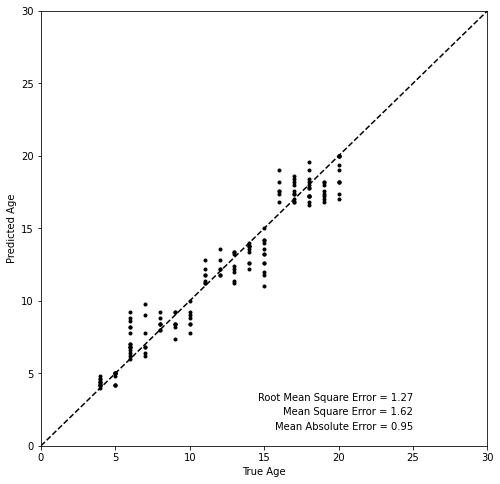

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=5)
model.fit(X_train, y_train)
predicted_test_y = model.predict(X_test)
rms_random_forest = scatter_y(y_test, predicted_test_y)
print("Root Mean Square error is %.2f." % (rms_random_forest))

{'max_features': 4, 'max_depth': 8}
Root Mean Square error decreases from 1.27 to 1.16.


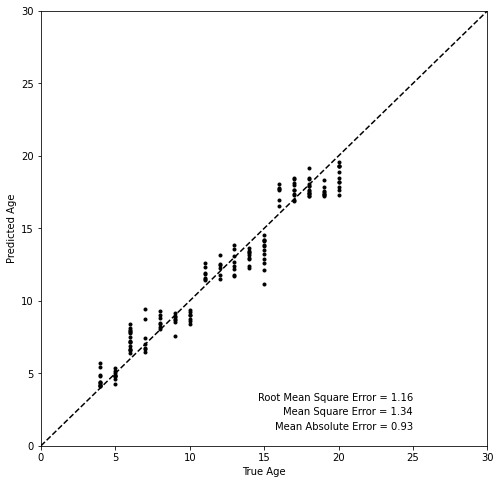

In [ ]:
model = RandomForestRegressor(n_estimators=100)
n_features = X.shape[1]

from sklearn.model_selection import RandomizedSearchCV
grid = RandomizedSearchCV(model, n_iter=20, 
            param_distributions=dict(
                                          max_depth=np.arange(5,20+1), 
                                          max_features=np.arange(1, n_features+1)
                                    )
         )
grid.fit(X_train, y_train)
print(grid.best_params_)

model = RandomForestRegressor(max_features=grid.best_params_["max_features"],
                              max_depth=grid.best_params_["max_depth"])
model.fit(X_train, y_train)
predicted_test_y = model.predict(X_test)
rms_optimized_random_forest = scatter_y(y_test, predicted_test_y)



print("Root Mean Square error decreases from %.2f to %.2f." % (rms_random_forest, rms_optimized_random_forest))

### KNN regressor

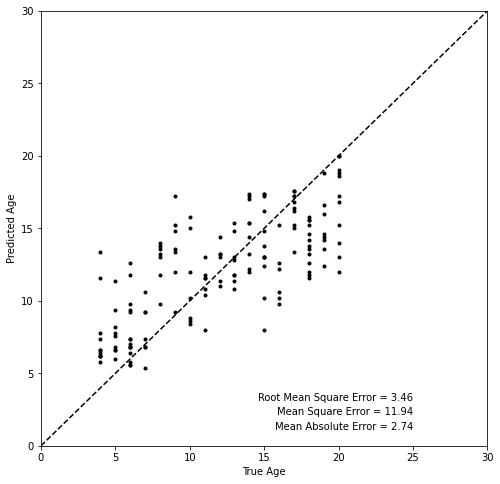

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=5)
neigh.fit(X_train, y_train)
predicted_test_y = neigh.predict(X_test)
rms_knn = scatter_y(y_test, predicted_test_y)

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

neigh = KNeighborsRegressor()

# Create 5 folds
seed = 13
kfold = KFold(n_splits=5, shuffle=True, random_state=seed)

# Define our candidate hyperparameters
hp_candidates = [{'n_neighbors': [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,50,60],
                  'weights': ['uniform','distance']}]

# Search for best hyperparameters
grid = GridSearchCV(estimator=neigh, param_grid=hp_candidates, cv=kfold, scoring='r2')
grid.fit(X_train, y_train)

# Get the results
print(grid.best_score_)
print(grid.best_estimator_)
print(grid.best_params_)

0.6168649441808463
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=12, p=2,
                    weights='distance')
{'n_neighbors': 12, 'weights': 'distance'}


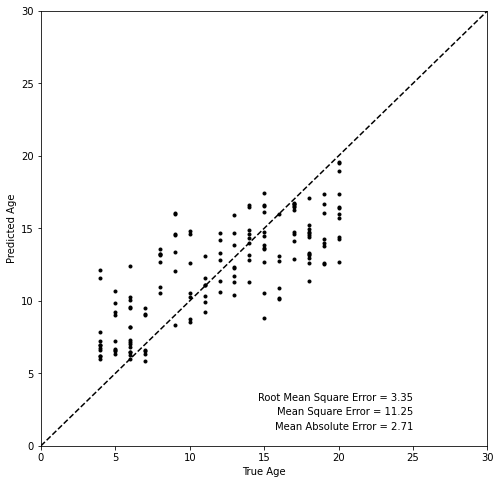

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
neigh_best = KNeighborsRegressor(n_neighbors = grid.best_params_["n_neighbors"],
                                 weights = grid.best_params_["weights"])
neigh_best.fit(X_train, y_train)
predicted_test_y = neigh_best.predict(X_test)
rms_knn = scatter_y(y_test, predicted_test_y)

### MLP Regressor

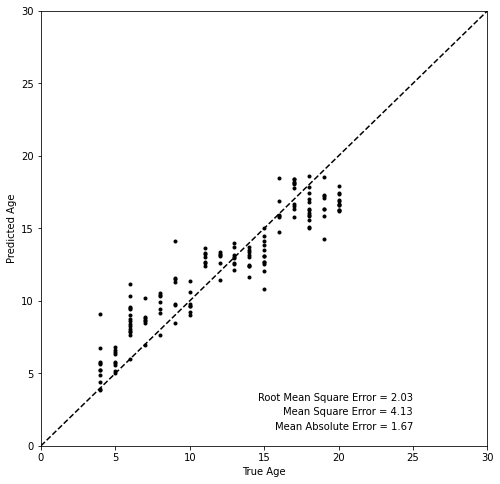

In [ ]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(random_state=1, max_iter=500).fit(X_train, y_train)
mlp.fit(X_train, y_train)
predicted_test_y = mlp.predict(X_test)
rms_mlp = scatter_y(y_test, predicted_test_y)

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
import itertools 

params = {'activation': ['relu', 'tanh', 'logistic', 'identity'],
          'hidden_layer_sizes': list(itertools.permutations([50,100,150],2)) + list(itertools.permutations([50,100,150],3)) + [50,100,150],
          'solver': ['adam', 'lbfgs'],
          'learning_rate' : ['constant', 'adaptive', 'invscaling']
         }

# Create 5 folds
seed = 13
kfold = KFold(n_splits=5, shuffle=True, random_state=seed)

mlp_regressor_grid = GridSearchCV(MLPRegressor(random_state=100), param_grid=params, n_jobs=-1, cv=kfold, verbose=5)
mlp_regressor_grid.fit(X_train,y_train)


Fitting 5 folds for each of 360 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:   26.3s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 878 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 1148 tasks      | elapsed: 11.4min
[Parallel(n_jobs=-1)]: Done 1454 tasks      | elapsed: 14.3min
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed: 16.8min
[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed: 16.8min finished


Train R^2 Score : 0.931
Test R^2 Score : 0.937
Best R^2 Score Through Grid Search : 0.926
Best Parameters :  {'activation': 'identity', 'hidden_layer_sizes': 150, 'learning_rate': 'constant', 'solver': 'lbfgs'}


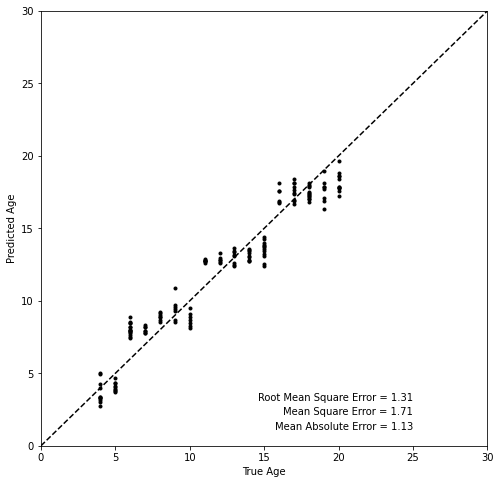

In [ ]:
mlp_best = MLPRegressor(hidden_layer_sizes= mlp_regressor_grid.best_params_['hidden_layer_sizes'],
                        activation = mlp_regressor_grid.best_params_['activation'],
                        learning_rate = mlp_regressor_grid.best_params_['learning_rate'],
                        solver = mlp_regressor_grid.best_params_['solver'],
                        random_state=1, max_iter=500).fit(X_train, y_train)
mlp_best.fit(X_train, y_train)
predicted_test_y = mlp_best.predict(X_test)
rms_mlp = scatter_y(y_test, predicted_test_y)